<a href="https://colab.research.google.com/github/Nishint0001/Mini-Project/blob/main/LoanSanctionAmoutPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [ ]:
df=pd.read_csv("LoanData.csv")
df

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,C-43723,Angelyn Clevenger,M,38,4969.41,Low,Commercial associate,Managers,Urban,76657.90,...,869.61,0,Unpossessed,566,4969.41,4,Urban,1,111096.56,68992.11
29996,C-32511,Silas Slaugh,M,20,1606.88,Low,Working,Laborers,Semi-Urban,66595.14,...,729.41,0,Inactive,175,1606.88,3,Urban,1,73453.94,46616.60
29997,C-5192,Carmelo Lone,F,49,NaN,Low,Working,Sales staff,Urban,81410.08,...,NaN,0,Active,959,NaN,1,Rural,1,102108.02,61057.56
29998,C-12172,Carolann Osby,M,38,2417.71,Low,Working,Security staff,Semi-Urban,142524.10,...,677.27,1,Unpossessed,375,2417.71,4,Urban,1,168194.47,99766.87


# DATA PREPROCESSING PART 1

In [ ]:
## Removing identifier column
df=df.drop(columns=["Customer ID","Name"],axis=1)
df.head(9)

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,N,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28
5,F,60,1234.92,Low,State servant,Secretaries,Rural,34434.72,181.48,N,...,684.12,1,Inactive,491,1234.92,2,Rural,1,43146.82,22382.57
6,M,43,2361.56,Low,Working,Laborers,Semi-Urban,152561.34,697.67,Y,...,637.29,0,Unpossessed,227,2361.56,1,Semi-Urban,1,221050.80,0.00
7,F,45,NaN,Low,State servant,Managers,Semi-Urban,240311.77,807.64,N,...,812.26,0,Active,314,NaN,2,Urban,1,401040.70,168218.24
8,F,38,1296.07,Low,Working,Cooking staff,Rural,35141.99,155.95,N,...,705.29,1,Active,241,1296.07,4,Rural,1,54903.44,22842.29


In [ ]:
#Check the number of unique values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       29947 non-null  object 
 1   Age                          30000 non-null  int64  
 2   Income (USD)                 25424 non-null  float64
 3   Income Stability             28317 non-null  object 
 4   Profession                   30000 non-null  object 
 5   Type of Employment           22730 non-null  object 
 6   Location                     30000 non-null  object 
 7   Loan Amount Request (USD)    30000 non-null  float64
 8   Current Loan Expenses (USD)  29828 non-null  float64
 9   Expense Type 1               30000 non-null  object 
 10  Expense Type 2               30000 non-null  object 
 11  Dependents                   27507 non-null  float64
 12  Credit Score                 28297 non-null  float64
 13  No. of Defaults 

In [ ]:
#check the number of unique value from all of the object datatype
df.select_dtypes("object").nunique()

Gender                     2
Income Stability           2
Profession                 8
Type of Employment        18
Location                   3
Expense Type 1             2
Expense Type 2             2
Has Active Credit Card     3
Property Location          3
dtype: int64

In [ ]:
df["Type of Employment"].unique()

array(['Sales staff', nan, 'High skill tech staff', 'Secretaries',
       'Laborers', 'Managers', 'Cooking staff', 'Core staff', 'Drivers',
       'Realty agents', 'Security staff', 'Accountants',
       'Private service staff', 'Waiters/barmen staff', 'Medicine staff',
       'Cleaning staff', 'Low-skill Laborers', 'HR staff', 'IT staff'],
      dtype=object)

In [ ]:
#Define a function to segment the values
def segment_employment_type(value):
  if pd.isna(value):
    return "Unknown"
  elif "Sales" in value or "Realty" in value:
    return "Sales/Realty"
  elif "Tech" in value or "IT" in value:
    return "Tech/IT"
  elif "Secretaries" in value or "HR" in value:
    return "Secretaries/HR"
  elif "Laborers" in value or "Low-skill Laborers" in value:
    return "Laborers"
  elif "Managers" in value:
    return "Managers"
  elif "Cooking" in value or "Waiters/barmen" in value:
    return "Hospitality"
  else:
    return "Others"

In [ ]:
#Apply the function
df["Type of Employment"]=df["Type of Employment"].apply(segment_employment_type)

In [ ]:
df["Type of Employment"].value_counts()

Others            9648
Unknown           7270
Laborers          5740
Sales/Realty      3822
Managers          2495
Hospitality        715
Secretaries/HR     233
Tech/IT             77
Name: Type of Employment, dtype: int64

<Axes: >

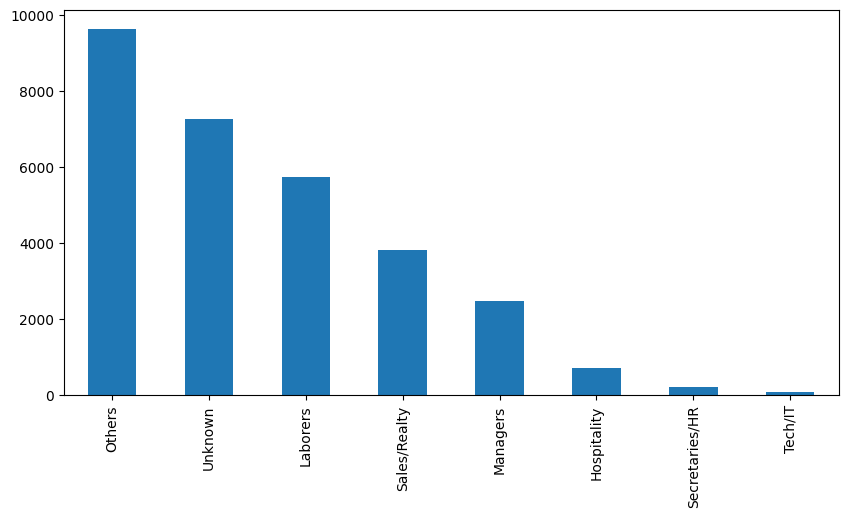

In [ ]:
plt.figure(figsize=(10,5))
df["Type of Employment"].value_counts().plot(kind="bar")

In [ ]:
##Get the names of all the columns with dtypes "object" (categorical column)
categorical=df.select_dtypes(include="object").columns.tolist()
categorical


['Gender',
 'Income Stability',
 'Profession',
 'Type of Employment',
 'Location',
 'Expense Type 1',
 'Expense Type 2',
 'Has Active Credit Card',
 'Property Location']

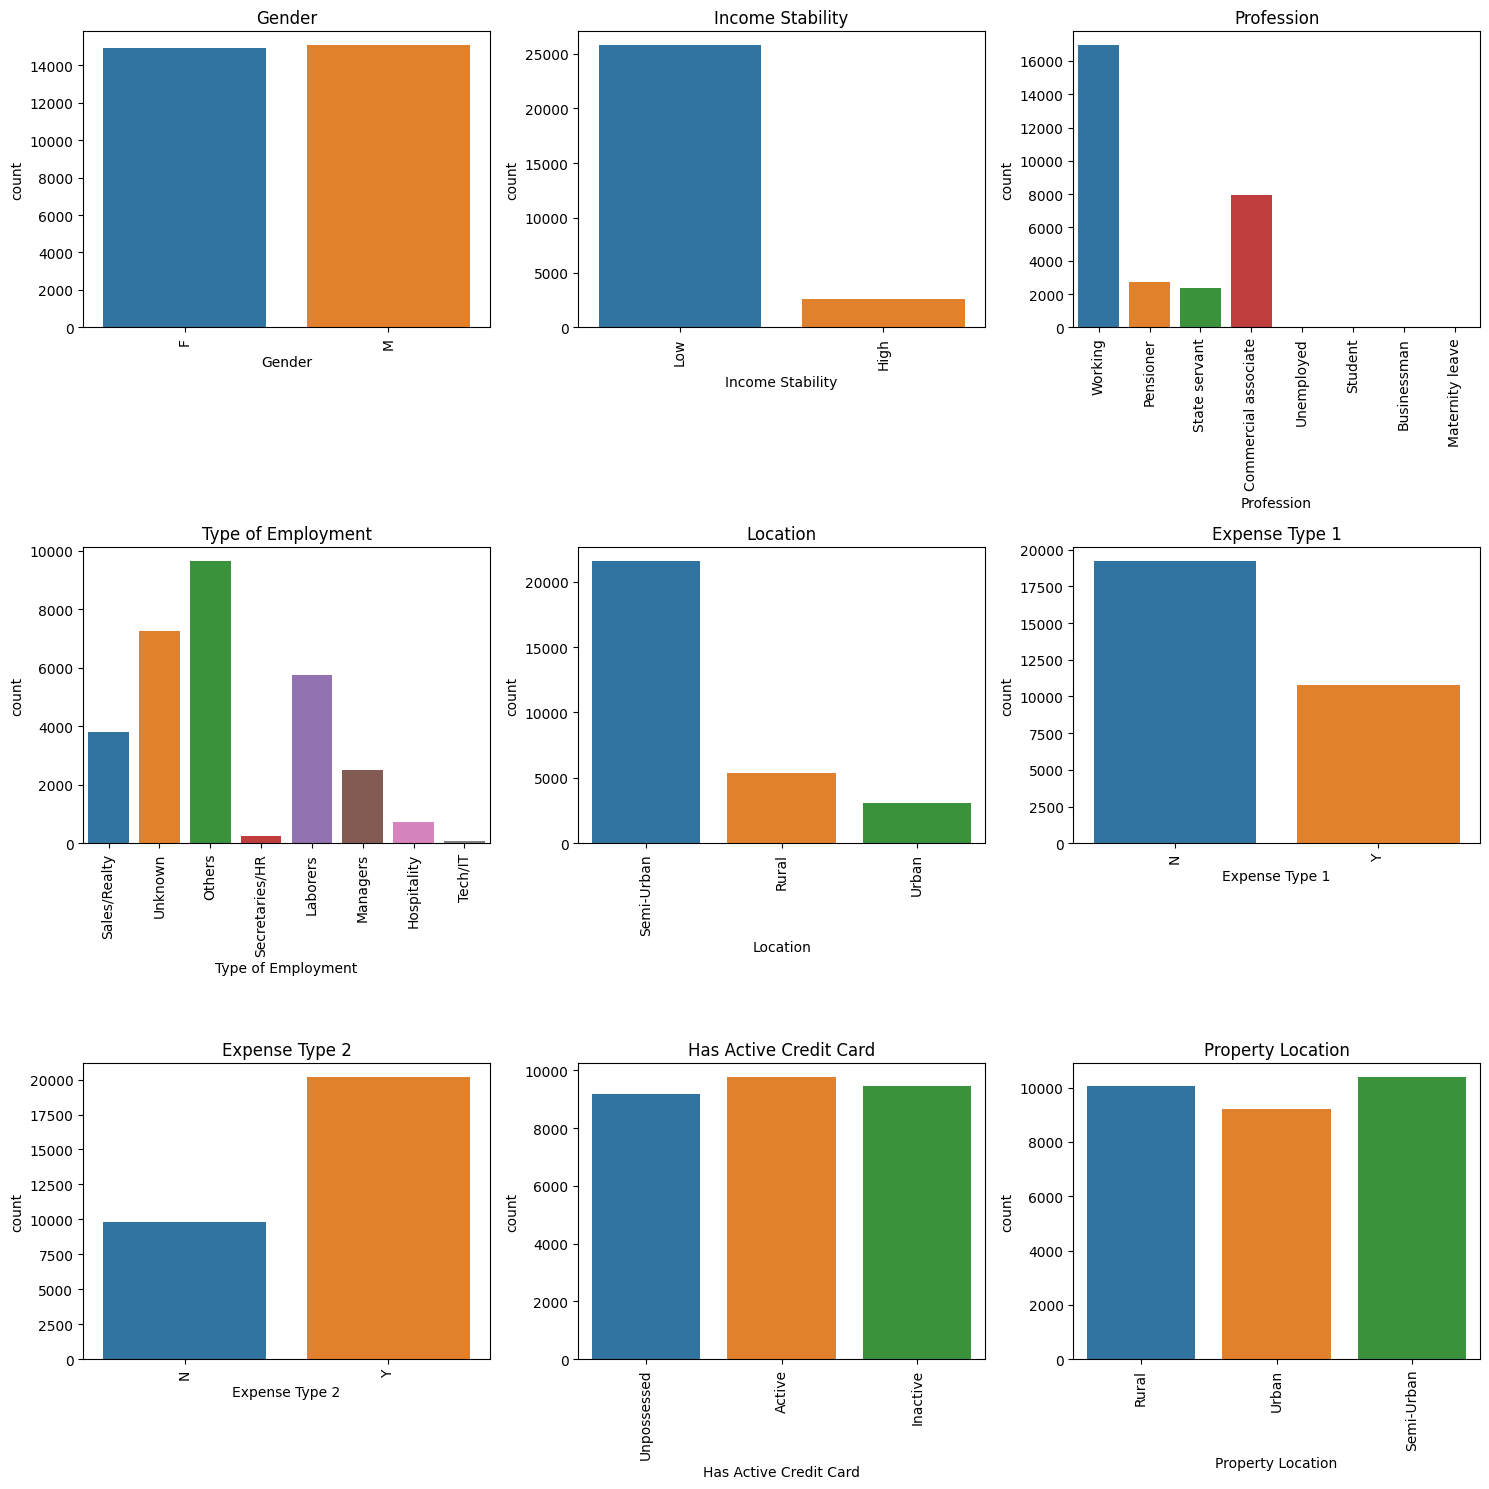

In [ ]:
#Create a figure with subplots
num_cols=len(categorical)
num_rows=(num_cols+2)//3
fig,axs=plt.subplots(nrows=num_rows,ncols=3,figsize=(15,5*num_rows))
axs=axs.flatten()


#Creating a countplot for the top 8 values of each categorical variable using seaborn
for i,var in enumerate(categorical):
  top_values=df[var].value_counts().nlargest(8).index
  filtered_df=df[df[var].isin(top_values)]
  sns.countplot(x=var,data=filtered_df,ax=axs[i])
  axs[i].set_title(var)
  axs[i].tick_params(axis="x",rotation=90)
#Adjust spacing between subplots
fig.tight_layout()


In [ ]:
#Get the names of all columns with data type "int" or "float"
numerical=df.select_dtypes(include=["int","float"]).columns.tolist()
numerical


['Age',
 'Income (USD)',
 'Loan Amount Request (USD)',
 'Current Loan Expenses (USD)',
 'Dependents',
 'Credit Score',
 'No. of Defaults',
 'Property ID',
 'Property Age',
 'Property Type',
 'Co-Applicant',
 'Property Price',
 'Loan Sanction Amount (USD)']

In [ ]:
#Get the names of all columns with data type "int" or "float"
numerical=df.select_dtypes(include=["int","float"]).columns.tolist()
exclude_vars=[ 'Loan Sanction Amount (USD)']
numerical=[var for var in numerical if var not in exclude_vars]
numerical


['Age',
 'Income (USD)',
 'Loan Amount Request (USD)',
 'Current Loan Expenses (USD)',
 'Dependents',
 'Credit Score',
 'No. of Defaults',
 'Property ID',
 'Property Age',
 'Property Type',
 'Co-Applicant',
 'Property Price']

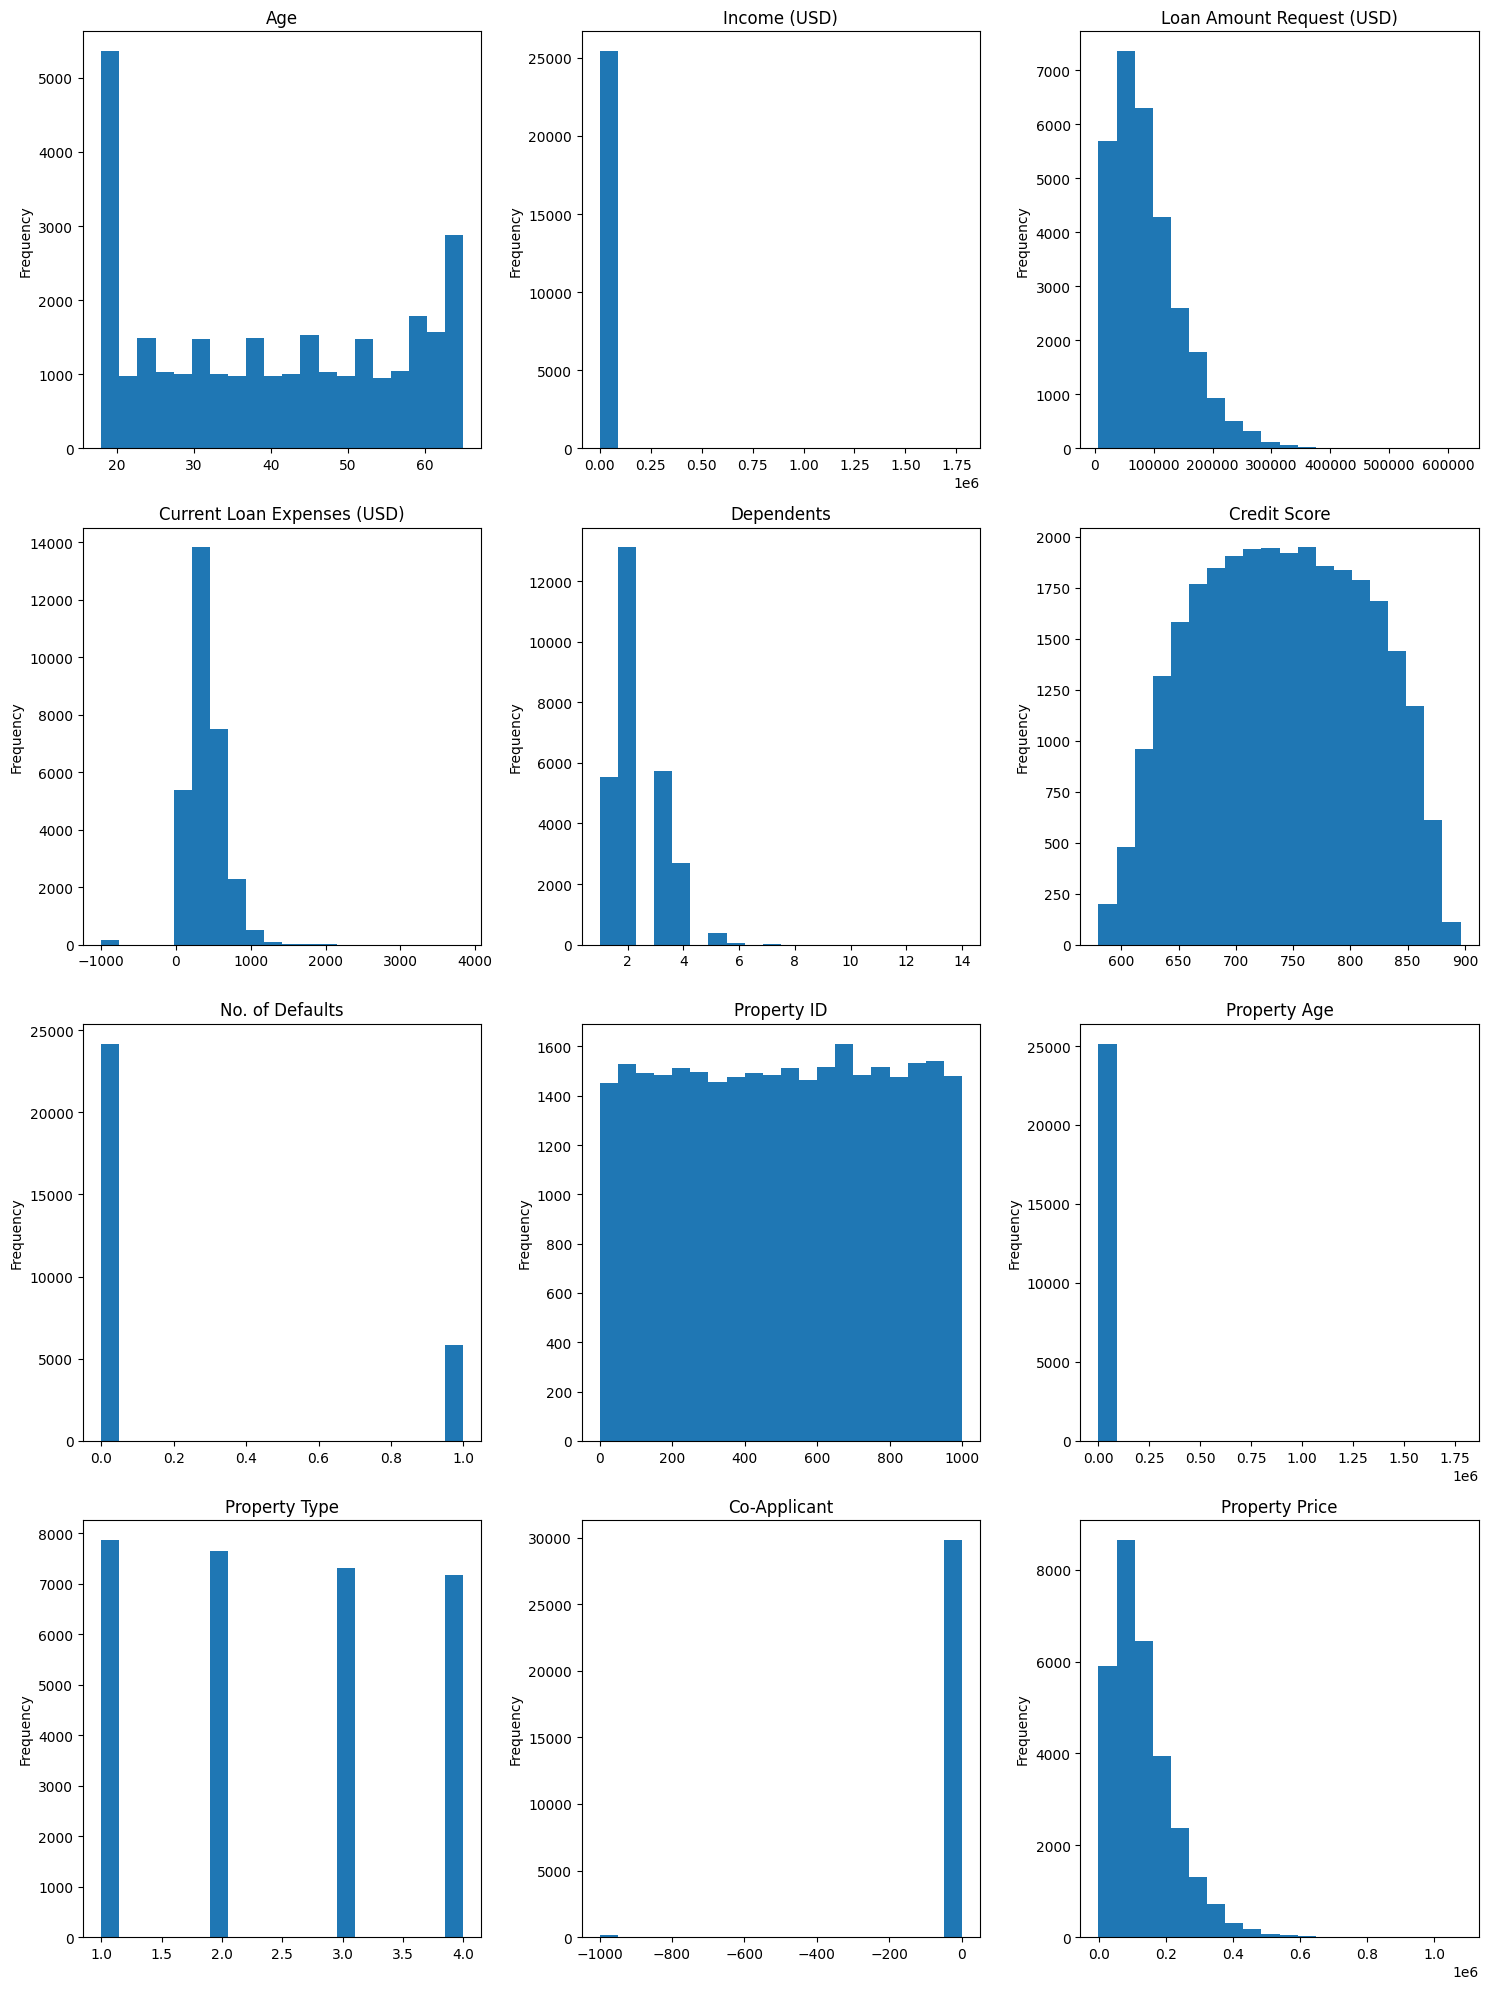

In [ ]:
# Get the names of all columns with data type 'int' or 'float' except 'marital_status' and 'cltv'
int_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()
exclude_vars = ['Loan Sanction Amount (USD)']
int_vars = [var for var in int_vars if var not in exclude_vars]

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable
for i, var in enumerate(int_vars):
    df[var].plot.hist(ax=axs[i], bins=20)  # You can adjust the number of bins as needed
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

# DATA PREPROCESSING PART 2


In [ ]:
#CHECK THE AMOUNT OF MISSING VALUE
check_missing=df.isnull().sum()*100/df.shape[0]
check_missing[check_missing>0].sort_values(ascending=False)

Property Age                   16.166667
Income (USD)                   15.253333
Dependents                      8.310000
Credit Score                    5.676667
Income Stability                5.610000
Has Active Credit Card          5.220000
Property Location               1.186667
Loan Sanction Amount (USD)      1.133333
Current Loan Expenses (USD)     0.573333
Gender                          0.176667
dtype: float64

In [ ]:
# fill the null valur with median because of the outliers
df["Property Age"].fillna(df["Property Age"].median(),inplace=True)
df["Income (USD)"].fillna(df["Income (USD)"].median(),inplace=True)
df["Dependents"].fillna(df["Dependents"].median(),inplace=True)
df["Credit Score"].fillna(df["Credit Score"].median(),inplace=True)
df["Loan Sanction Amount (USD)"].fillna(df["Loan Sanction Amount (USD)"].median(),inplace=True)
df["Current Loan Expenses (USD)"].fillna(df["Current Loan Expenses (USD)"].median(),inplace=True)

In [ ]:
#remove null value on some column
df.dropna(subset=["Income Stability","Has Active Credit Card","Property Location","Gender"],inplace=True)

In [ ]:
df.shape

(26474, 22)

# Label Encoding for Object Datatypes


In [ ]:
#Loop over each column in the dataframe
for col in df.select_dtypes(include=["object"]).columns:
  print(f"{col}: {df[col].unique()}")

Gender: ['M' 'F']
Income Stability: ['Low' 'High']
Profession: ['Working' 'Pensioner' 'State servant' 'Commercial associate' 'Unemployed']
Type of Employment: ['Unknown' 'Others' 'Secretaries/HR' 'Laborers' 'Managers' 'Hospitality'
 'Sales/Realty' 'Tech/IT']
Location: ['Semi-Urban' 'Rural' 'Urban']
Expense Type 1: ['N' 'Y']
Expense Type 2: ['Y' 'N']
Has Active Credit Card: ['Unpossessed' 'Active' 'Inactive']
Property Location: ['Rural' 'Urban' 'Semi-Urban']


In [ ]:
from sklearn import preprocessing

for i in df.select_dtypes(include=["object"]).columns:
  #Initialize a labelEncoder object
  label_encoder=preprocessing.LabelEncoder()
  #Fit the encoder to the unique values in the column
  label_encoder.fit(df[i].unique())
  #Transform the columns
  df[i]=label_encoder.transform(df[i])
   # Print the column name and the unique encoded values
  print(f"{i}: {df[i].unique()}")

Gender: [1 0]
Income Stability: [1 0]
Profession: [4 1 2 0 3]
Type of Employment: [7 3 5 1 2 0 4 6]
Location: [1 0 2]
Expense Type 1: [0 1]
Expense Type 2: [1 0]
Has Active Credit Card: [2 0 1]
Property Location: [0 2 1]


<Axes: >

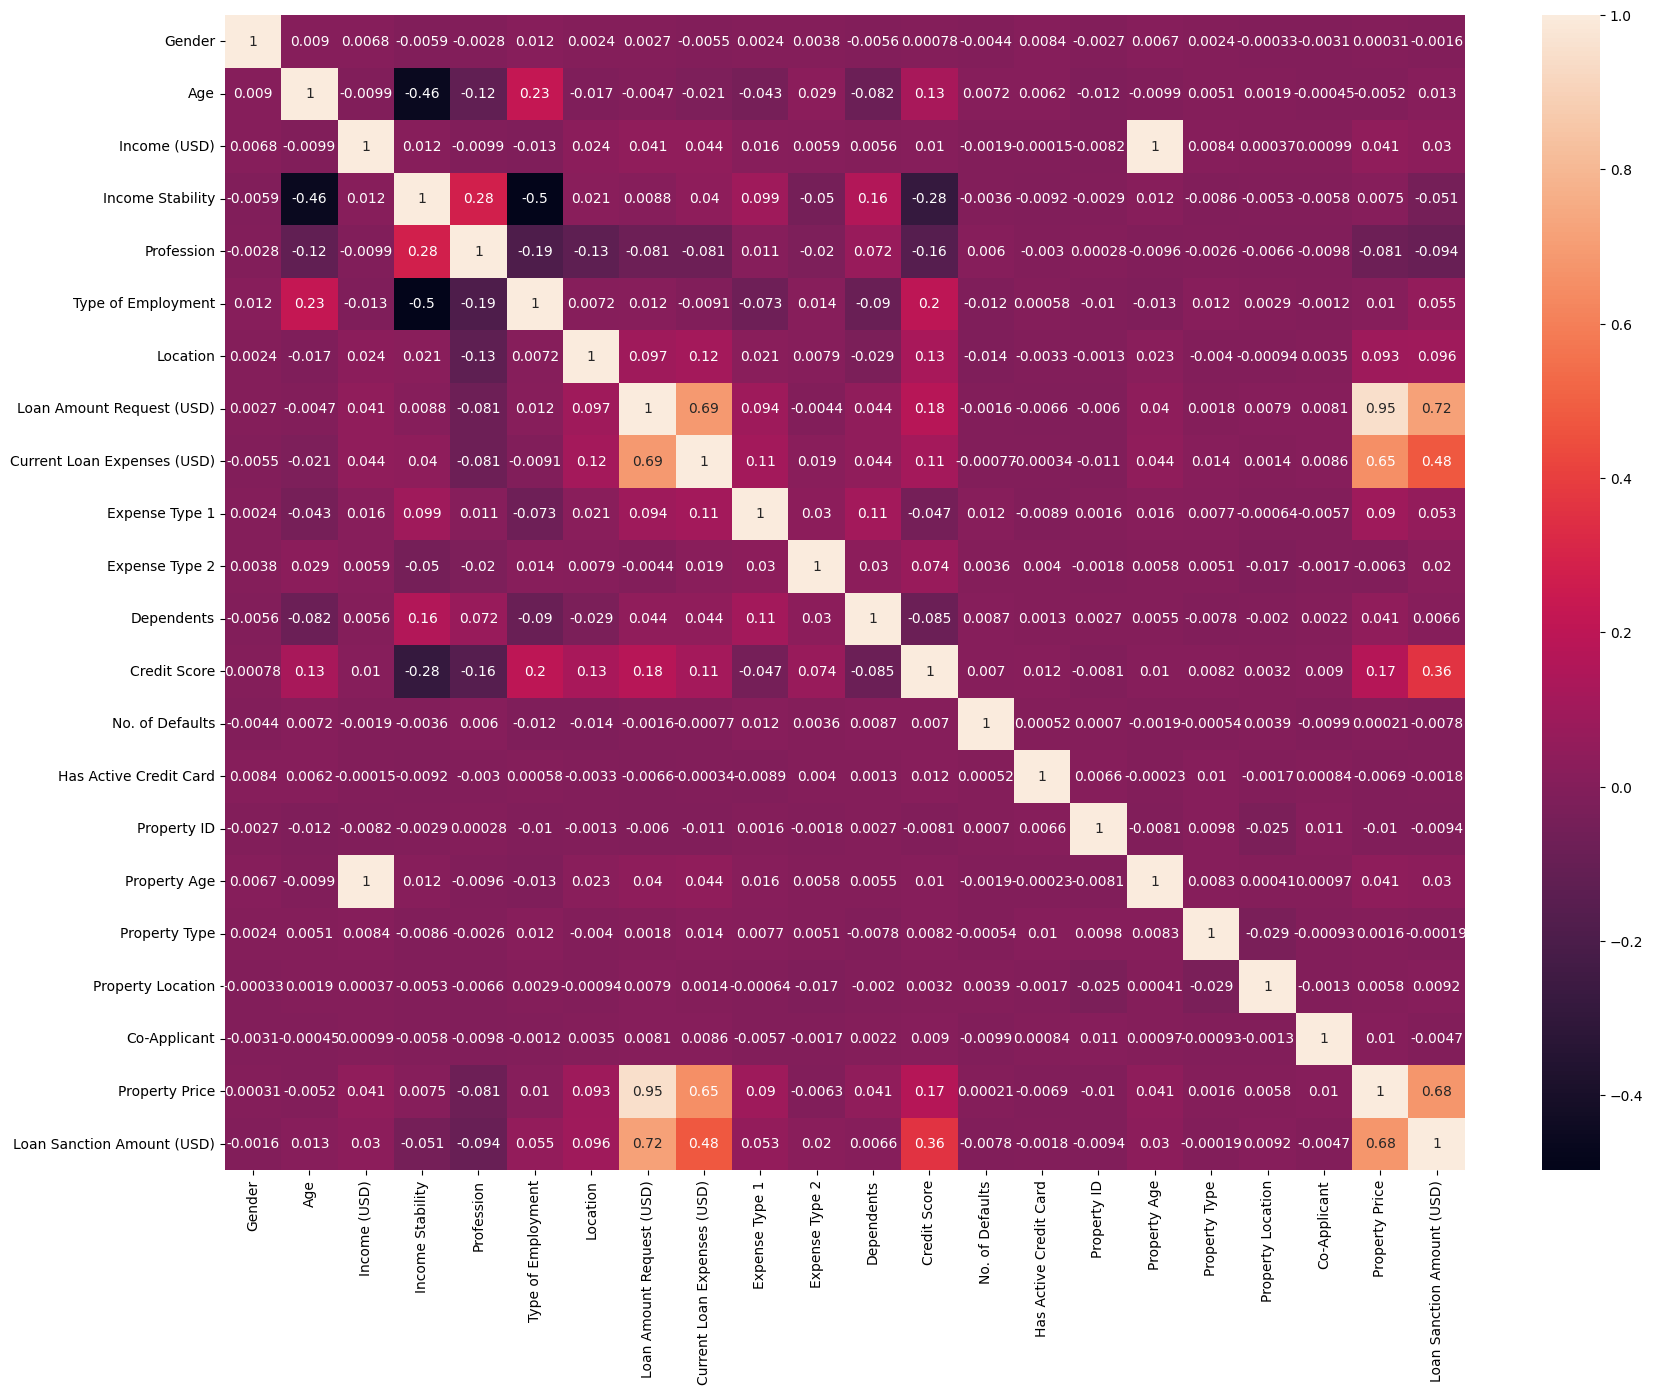

In [ ]:
#CORRELATION HEATMAP
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

# Train Test Split

In [ ]:
x=df.drop("Loan Sanction Amount (USD)",axis=1)
x

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
1,1,32,4952.910,1,4,7,1,46837.47,495.81,0,...,1.0,780.40,0,2,608,4952.91,2,0,1,54791.00
2,0,65,988.190,0,1,7,1,45593.04,171.95,0,...,1.0,833.15,0,2,546,988.19,2,2,0,72440.58
3,0,65,2222.435,0,1,7,0,80057.92,298.54,0,...,2.0,832.70,1,2,890,2223.25,2,1,1,121441.51
4,0,31,2614.770,1,4,3,1,113858.89,491.41,0,...,2.0,745.55,1,0,715,2614.77,4,1,1,208567.91
5,0,60,1234.920,1,2,5,0,34434.72,181.48,0,...,2.0,684.12,1,1,491,1234.92,2,0,1,43146.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,38,4969.410,1,0,2,2,76657.90,722.34,1,...,2.0,869.61,0,2,566,4969.41,4,2,1,111096.56
29996,1,20,1606.880,1,4,1,1,66595.14,253.04,0,...,3.0,729.41,0,1,175,1606.88,3,2,1,73453.94
29997,0,49,2222.435,1,4,4,2,81410.08,583.11,0,...,2.0,739.82,0,0,959,2223.25,1,0,1,102108.02
29998,1,38,2417.710,1,4,3,1,142524.10,378.29,0,...,3.0,677.27,1,2,375,2417.71,4,2,1,168194.47


In [ ]:
y=df["Loan Sanction Amount (USD)"]
y

1         37469.98
2         36474.43
3         56040.54
4         74008.28
5         22382.57
           ...    
29995     68992.11
29996     46616.60
29997     61057.56
29998     99766.87
29999    117217.90
Name: Loan Sanction Amount (USD), Length: 26474, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from scipy import stats
## REMOVE OUTLIER FROM TRAIN DATA USING Z-SCORE
#Columns for which you want to remove outliers
selected_columns = ['Income (USD)', 'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
                    'Dependents', 'Property Age', 'Co-Applicant', 'Property Price']

#calc the z-scores
z_score=np.abs(stats.zscore(x_train[selected_columns]))

# Set a threshold value
threshold=3

outlier_indices=np.where(z_score>threshold)[0]

#Remove the outliers
x_train=x_train.drop(x_train.index[outlier_indices])
y_train=y_train.drop(y_train.index[outlier_indices])




# DECISION TREE REGRESSOR

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

#Create a object for DTR
dtr=DecisionTreeRegressor()
#Hyperparameters
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [0, 42]
}

#Create a GSCV object
gscv=GridSearchCV(dtr,param_grid=param_grid,cv=5)

#Fit the Grid Search CV
gscv.fit(x_train,y_train)



`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6, 8],
                         'random_state': [0, 42]})

In [ ]:
print(gscv.best_params_)

{'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 8, 'random_state': 0}


In [ ]:
dtr=DecisionTreeRegressor(random_state=42,max_depth=6, max_features='auto', min_samples_leaf=3, min_samples_split=8)
dtr.fit(x_train,y_train)

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.


DecisionTreeRegressor(max_depth=6, max_features='auto', min_samples_leaf=3,
                      min_samples_split=8, random_state=42)

In [ ]:

from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error,mean_squared_error,accuracy_score
import math

y_pred=dtr.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=metrics.r2_score(y_test,y_pred)
rmse=math.sqrt(mse)


print("mae is",mae)
print("mape is",mape)
print("mse is",mse)
print("r2 score is",r2)
print("rmse score is ",rmse)




mae is 12141.254048177878
mape is 2.0730047679149834e+19
mse is 539755045.21907
r2 score is 0.7566977581658485
rmse score is  23232.628891691744


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


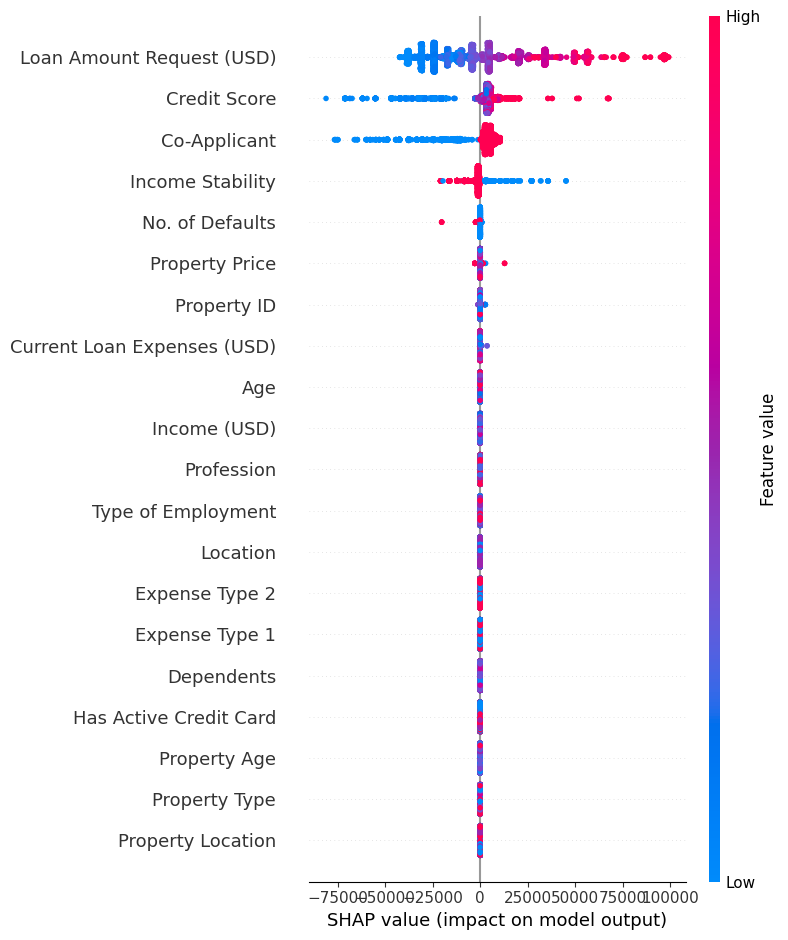

In [ ]:
%pip install shap
import shap
explainer=shap.TreeExplainer(dtr)
shap_values=explainer.shap_values(x_test)
shap.summary_plot(shap_values,x_test)

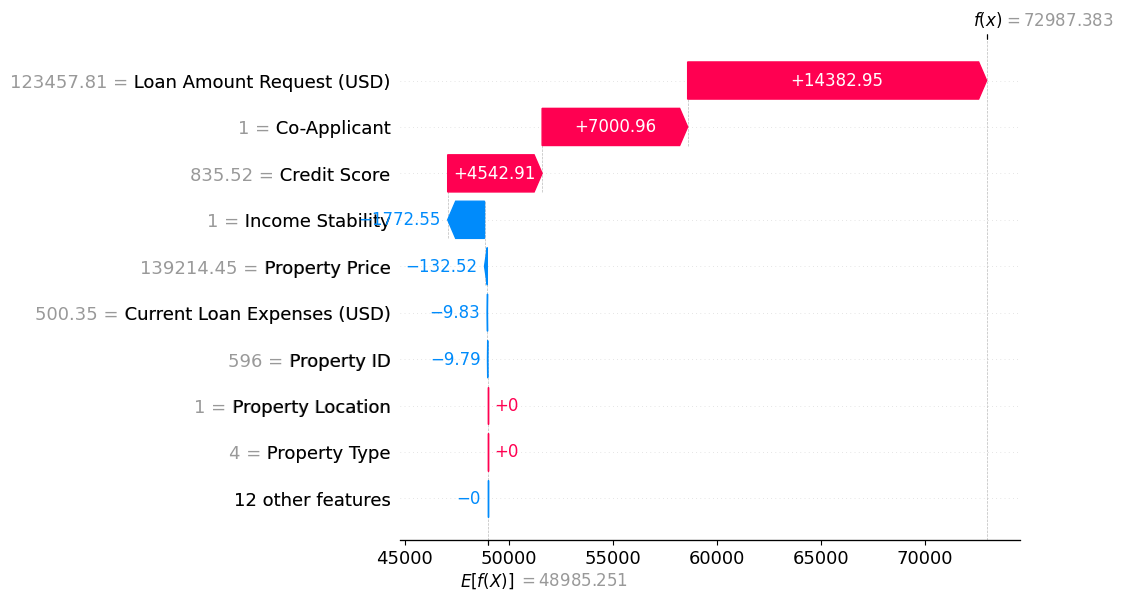

In [ ]:
explainer=shap.Explainer(dtr,x_test)
shap_values=explainer(x_test,check_additivity=False)
shap.plots.waterfall(shap_values[0])


# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
#creating object
rf=RandomForestRegressor()
#hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'random_state': [0, 42]
}

#Create a GridSearchCV object
gscv=GridSearchCV(rf,param_grid=param_grid,cv=5,scoring="r2")
#Fit the GSCV
gscv.fit(x_train,y_train)
## Print the best hyperparameters
print(gscv.best_params_)

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
`max

{'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 42}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42, max_depth=9, min_samples_split=2, min_samples_leaf=2,
                           max_features='auto')
rf.fit(x_train, y_train)

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


RandomForestRegressor(max_depth=9, max_features='auto', min_samples_leaf=2,
                      random_state=42)

In [ ]:

from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error,mean_squared_error,accuracy_score
import math

y_pred=rf.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=metrics.r2_score(y_test,y_pred)
rmse=math.sqrt(mse)


print("mae is",mae)
print("mape is",mape)
print("mse is",mse)
print("r2 score is",r2)
print("rmse score is ",rmse)




mae is 11798.039165287524
mape is 2.0199292140936393e+19
mse is 555373563.3012724
r2 score is 0.7496574896270249
rmse score is  23566.36508461312


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


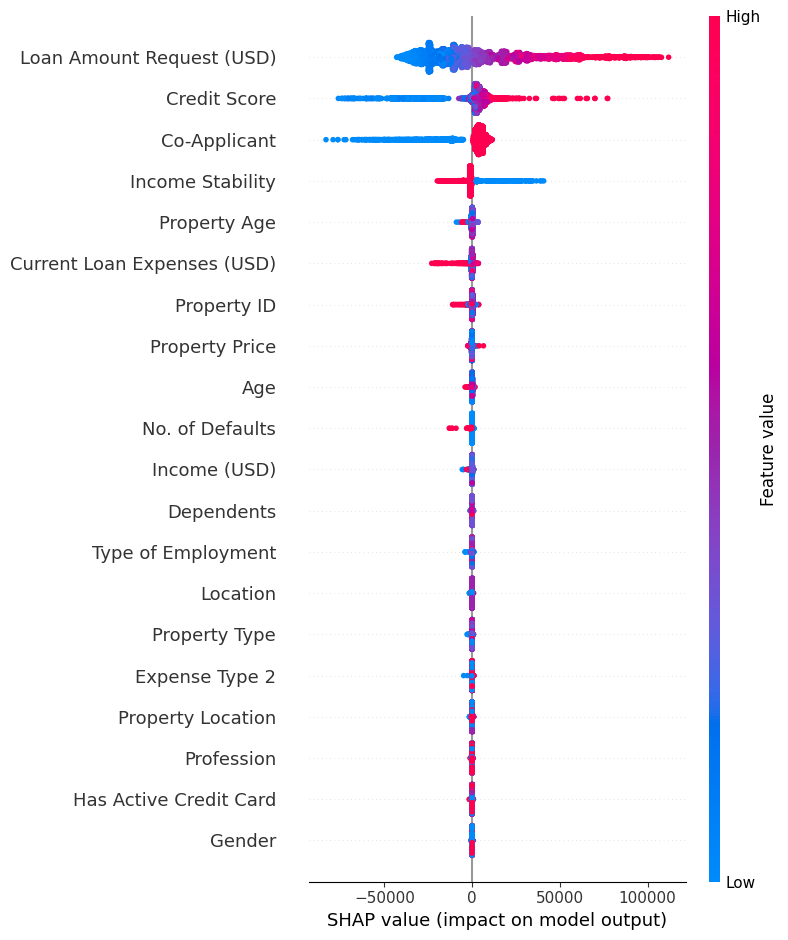

In [ ]:
import shap
explainer=shap.TreeExplainer(rf)
shap_values=explainer.shap_values(x_test)
shap.summary_plot(shap_values,x_test)

 99%|===================| 5253/5295 [00:51<00:00]       

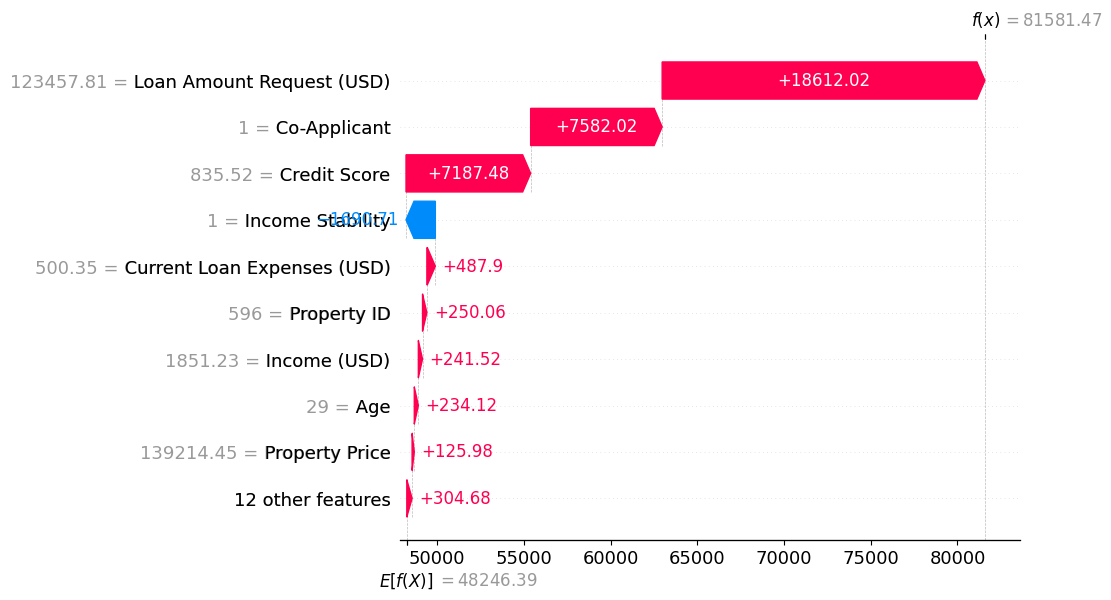

In [ ]:
explainer=shap.Explainer(rf,x_test,check_additivity=False)
shap_values=explainer(x_test,check_additivity=False)
shap.plots.waterfall(shap_values[0])


In [ ]:
#completed...........